# Notebook used to estimate epidemic waves

In [1]:
import pandas as pd
from functools import reduce
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/world_r_eff.csv',
        usecols=['country','date','R'],
        parse_dates=['date'],
        squeeze=True
        ).sort_index()

In [3]:
trend_length = 14
logic_func = lambda r: reduce(lambda x, y: x + 1 if y else 0, r)

In [4]:
df_total = pd.DataFrame(columns=['country',	'date',	'R', 'increasing', 'decreasing', 'upward_slope_days', 'downward_slope_days' ])
for country in df.country.unique():
    print(country)
    df_country = df.loc[df['country'] == country]
    
    # counts number consecutive days with R>=1 for a give date
    ser = df.loc[df['country'] == country]['R'] >= 1
    df_country['increasing'] = ser.expanding().apply(logic_func)

    # counts number consecutive days with R<1 for a give date
    ser = df_country['R'] < 1
    df_country['decreasing'] = ser.expanding().apply(logic_func)

    # # counts number consecutive days with upward slope
    ser = df_country['increasing'] >= trend_length
    df_country['upward_slope_days'] = ser.expanding().apply(logic_func)

    # # counts number consecutive days with downward_slope
    ser = df_country['decreasing'] >= trend_length
    df_country['downward_slope_days'] = ser.expanding().apply(logic_func)
    
    # append df to total_df
    df_total = pd.concat([df_total, df_country])

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Brazil
Brunei
Bolivia
Bosnia and Herzegovina
Botswana
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Monte

In [11]:
df_total.max()

country                           Zimbabwe
date                   2021-12-04 00:00:00
R                                 5.764254
increasing                           390.0
decreasing                           401.0
upward_slope_days                    377.0
downward_slope_days                  388.0
dtype: object

In [16]:
df_total.min()

country                        Afghanistan
date                   2020-01-02 00:00:00
R                                -0.012878
increasing                             0.0
decreasing                             0.0
upward_slope_days                      0.0
downward_slope_days                    0.0
dtype: object

In [18]:
df_total.mean()

<ipython-input-18-db2fbd371d0a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_total.mean()


R                       1.019095
increasing             23.425851
decreasing             21.943083
upward_slope_days      17.300905
downward_slope_days    16.800905
dtype: float64

In [19]:
df_total.std()

date                   153 days 03:17:29.132648038
R                                         0.356771
increasing                                38.16587
decreasing                               45.678511
upward_slope_days                        34.358908
downward_slope_days                       42.25848
dtype: object

In [13]:
# counts downward slopes and finds duration of them
ser = df_total['downward_slope_days'] > 0
count_down = df_total['downward_slope_days'] [ser & (ser != ser.shift(-1))].value_counts(normalize=True)
count_down_df = count_down.to_frame().reset_index().rename(columns={'index':'duration','downward_slope_days':'fraction' })
count_down_df.duration += 13
count_down_df = count_down_df.sort_values(by=['duration'])
count_down_df

,duration,fraction
0,14.0,0.032733
7,15.0,0.019640
5,16.0,0.022913
1,17.0,0.031097
50,18.0,0.008183
...,...,...
133,210.0,0.001637
121,213.0,0.001637
138,216.0,0.001637
131,293.0,0.001637


In [12]:
# counts downward slopes and finds duration of them
ser = df_total['upward_slope_days'] > 0
count_up = df_total['upward_slope_days'] [ser & (ser != ser.shift(-1))].value_counts(normalize=True)
count_up_df = count_up.to_frame().reset_index().rename(columns={'index':'duration','upward_slope_days':'fraction' })
count_up_df.duration += 13
count_up_df = count_up_df.sort_values(by=['duration'])
count_up_df

,duration,fraction
3,14.0,0.030965
0,15.0,0.032787
9,16.0,0.021858
52,17.0,0.007286
5,18.0,0.025501
...,...,...
92,304.0,0.001821
89,323.0,0.001821
118,374.0,0.001821
94,379.0,0.001821


Text(0, 0.5, 'Fraction')

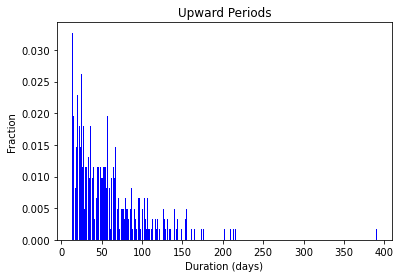

In [14]:
plt.bar(count_up_df['duration'], count_up_df['fraction'], color='b')
plt.title('Upward Periods')
plt.xlabel('Duration (days)')
plt.ylabel('Fraction')

Text(0, 0.5, 'Fraction')

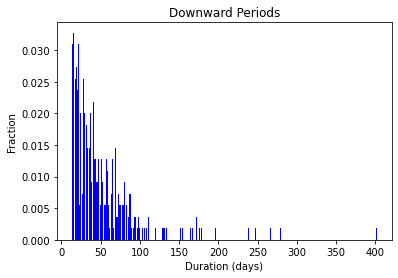

In [15]:
plt.bar(count_down_df['duration'], count_down_df['fraction'], color='b')
plt.title('Downward Periods')
plt.xlabel('Duration (days)')
plt.ylabel('Fraction')